In [4]:
# Install Libraries
!pip install pycaret[full] pandas matplotlib scikit-learn

# Import Libraries
import pandas as pd
from pycaret.regression import *
import matplotlib.pyplot as plt

# Download Dataset
!wget -q https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv
df_wine = pd.read_csv('/content/winequality-red.csv', sep=';')

In [13]:
# Explore Dataset
print("First Few Rows:")
print(df_wine.head())

# Set Up PyCaret
exp = RegressionExperiment()

exp.setup(data=df_wine, target='alcohol')

First Few Rows:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2   

,Description,Value
0,Session id,966
1,Target,alcohol
2,Target type,Regression
3,Original data shape,"(1599, 12)"
4,Transformed data shape,"(1599, 12)"
5,Transformed train set shape,"(1119, 12)"
6,Transformed test set shape,"(480, 12)"
7,Numeric features,11
8,Preprocess,True
9,Imputation type,simple


In [14]:
# Compare Models
best_model = compare_models()

# Print the Best Model
print("Best Model:")
print(best_model)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,0.3290,0.2316,0.4782,0.7950,0.0408,0.0312,1.9850
lightgbm,Light Gradient Boosting Machine,0.3514,0.2643,0.5107,0.7651,0.0436,0.0334,1.0650
xgboost,Extreme Gradient Boosting,0.3436,0.2745,0.5190,0.7580,0.0444,0.0326,0.1520
et,Extra Trees Regressor,0.3610,0.2944,0.5398,0.7388,0.0461,0.0343,0.4260
gbr,Gradient Boosting Regressor,0.4015,0.2988,0.5426,0.7366,0.0464,0.0382,0.2430
rf,Random Forest Regressor,0.3901,0.3098,0.5532,0.7259,0.0473,0.0371,0.6260
lr,Linear Regression,0.4528,0.3567,0.5962,0.6781,0.0515,0.0432,0.0260
lar,Least Angle Regression,0.4568,0.3625,0.6007,0.6721,0.0519,0.0436,0.0340
ada,AdaBoost Regressor,0.5609,0.4855,0.6950,0.5678,0.0600,0.0542,0.2740
dt,Decision Tree Regressor,0.4928,0.5616,0.7429,0.4967,0.0641,0.0469,0.0310


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

Best Model:


In [15]:
best_model = create_model('catboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.3631,0.2744,0.5238,0.7819,0.0450,0.0344
1,0.3604,0.3672,0.6060,0.7313,0.0480,0.0325
2,0.3019,0.1956,0.4423,0.8054,0.0382,0.0291
3,0.3245,0.1947,0.4412,0.8318,0.0392,0.0315
4,0.3026,0.1788,0.4228,0.8366,0.0363,0.0291
5,0.3328,0.2253,0.4746,0.7747,0.0410,0.0319
6,0.3459,0.2488,0.4988,0.8232,0.0420,0.0322
7,0.3042,0.1723,0.4151,0.8159,0.0366,0.0295
8,0.3518,0.2468,0.4968,0.7497,0.0432,0.0339


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

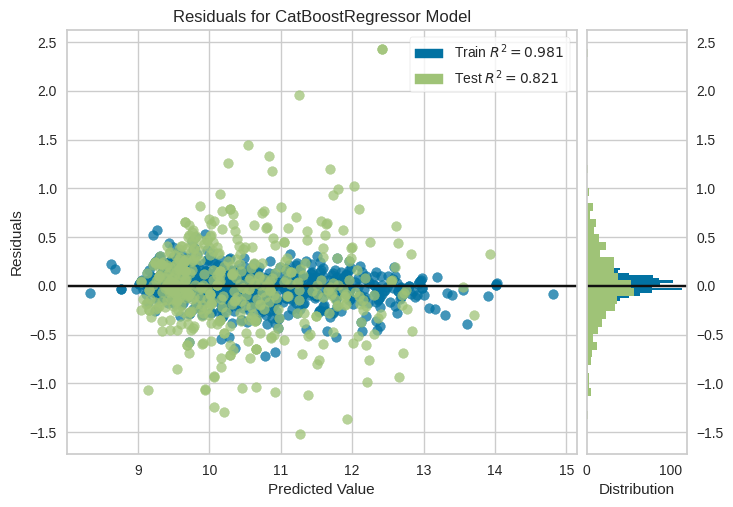

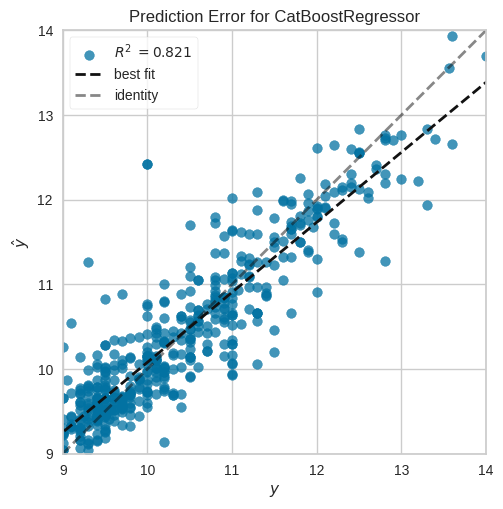

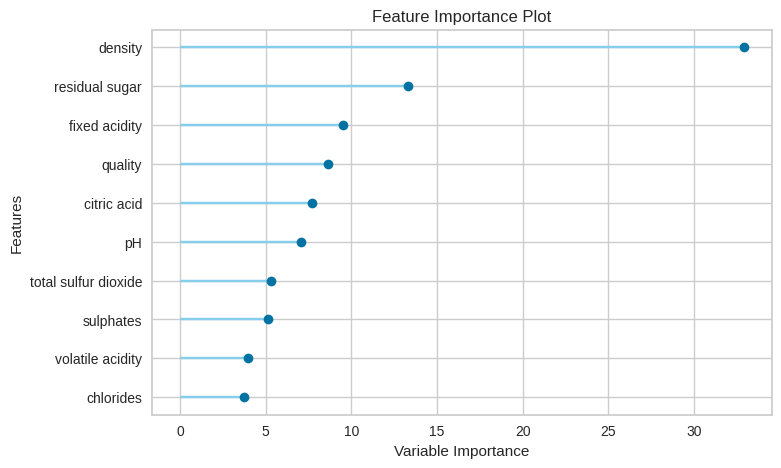

In [16]:
plot_model(best_model, plot='residuals')
plot_model(best_model, plot='error')
plot_model(best_model, plot='feature')

In [18]:
holdout_predictions = predict_model(best_model)

holdout_predictions.head()


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,0.3152,0.2024,0.4498,0.8208,0.0386,0.0302


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,quality,alcohol,prediction_label
178,7.0,0.805,0.00,2.5,0.068,7.0,20.0,0.99690,3.48,0.56,5,9.6,10.047318
1411,6.4,0.470,0.40,2.4,0.071,8.0,19.0,0.99630,3.56,0.73,6,10.6,10.692529
503,10.5,0.260,0.47,1.9,0.078,6.0,24.0,0.99760,3.18,1.04,7,10.9,10.715501
990,7.7,0.390,0.12,1.7,0.097,19.0,27.0,0.99596,3.16,0.49,5,9.4,9.381015
1050,7.1,0.430,0.17,1.8,0.082,27.0,51.0,0.99634,3.49,0.64,5,10.4,10.178109


In [19]:
# save pipeline
save_model(best_model, 'my_first_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['fixed acidity',
                                              'volatile acidity', 'citric acid',
                                              'residual sugar', 'chlorides',
                                              'free sulfur dioxide',
                                              'total sulfur dioxide', 'density',
                                              'pH', 'sulphates', 'quality'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('clean_column_names',
                  TransformerWrapper(transformer=CleanColumnNames())),
                 ('trained_model',
                  <catboost.core.CatBoostRegressor object at 0x7968204cb370>)